In [1]:
#import packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#read the data
df = pd.read_csv('Dataset.csv')

In [3]:
#to view first 5 records of teh data set
df.head()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,Urbanity,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,store,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [4]:
# Get some basic statistics on the numerical columns
print(df.describe())

         CustomerID       recency  historical customer spend  \
count  64000.000000  64000.000000               64000.000000   
mean   32000.500000      5.763734                 242.085656   
std    18475.352951      3.507592                 256.158608   
min        1.000000      1.000000                  29.990000   
25%    16000.750000      2.000000                  64.660000   
50%    32000.500000      6.000000                 158.110000   
75%    48000.250000      9.000000                 325.657500   
max    64000.000000     12.000000                3345.930000   

       has_used_discount_in_the_past  has_used_bogo_in_the_past   is_referral  \
count                   64000.000000               64000.000000  64000.000000   
mean                        0.551031                   0.549719      0.502250   
std                         0.497393                   0.497526      0.499999   
min                         0.000000                   0.000000      0.000000   
25%               

In [5]:
#Check the data types of the columns in the DataFrame.
print(df.dtypes)

CustomerID                         int64
recency                            int64
historical customer spend        float64
has_used_discount_in_the_past      int64
has_used_bogo_in_the_past          int64
Urbanity                          object
is_referral                        int64
channel                           object
offer                             object
conversion                         int64
dtype: object


In [6]:
#Check for missing values in the DataFrame.
print(df.isnull().sum())

CustomerID                       0
recency                          0
historical customer spend        0
has_used_discount_in_the_past    0
has_used_bogo_in_the_past        0
Urbanity                         0
is_referral                      0
channel                          0
offer                            0
conversion                       0
dtype: int64


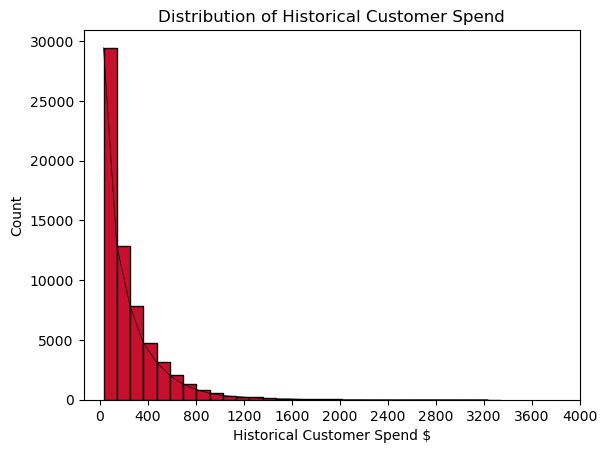

In [7]:
import matplotlib.pyplot as plt

# Create a histogram of historical customer spend
# plt.hist(df['historical customer spend'], bins=10, color='#C8102E', edgecolor='black')

# Add a line graph on top of the histogram bars
n, bins, patches = plt.hist(df['historical customer spend'], bins=30, color='#C8102E', edgecolor='black')
plt.plot(bins[:-1], n, color='black', linewidth=0.5)

# Add labels and title
plt.xlabel('Historical Customer Spend $')
plt.ylabel('Count')
plt.title('Distribution of Historical Customer Spend')

# Set x-axis ticks
# min_val = df['historical customer spend'].min()
# max_val = df['historical customer spend'].max()
min_val = 0
max_val = 4000
step = (max_val - min_val) / 10
plt.xticks([min_val + i*step for i in range(11)])

# Show the plot
plt.show()

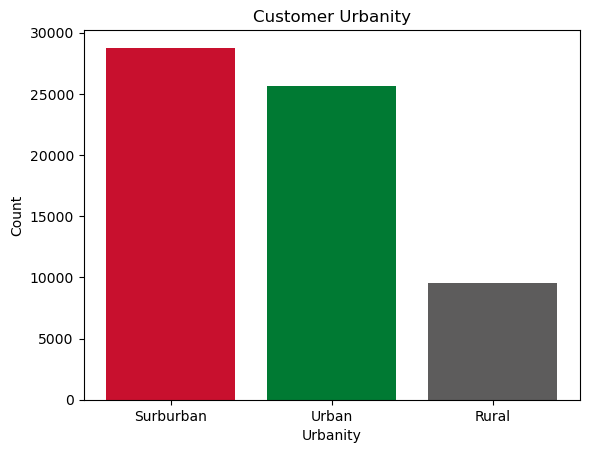

In [8]:

# Create a bar chart of Urbanity

# set color palette
colors = ["#C8102E", "#007A33", "#5D5C5C"]

urbanity_counts = df['Urbanity'].value_counts()
plt.bar(urbanity_counts.index, urbanity_counts.values, color=colors)

# Add labels and title
plt.xlabel('Urbanity')
plt.ylabel('Count')
plt.title('Customer Urbanity')

# Show the plot
plt.show()

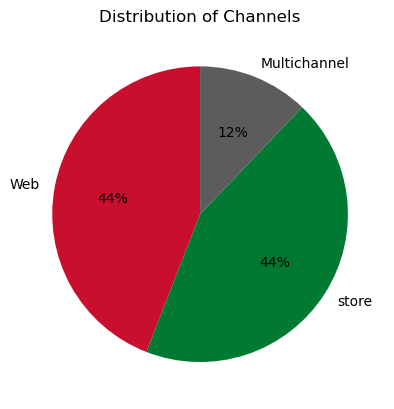

In [9]:
# Count the number of occurrences of each channel
channel_counts = df['channel'].value_counts()

# Get the labels and values for the pie chart
labels = channel_counts.index
values = channel_counts.values

# Set the color palette
colors = ["#C8102E", "#007A33", "#5D5C5C"]

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)

# Add title
plt.title('Distribution of Channels')

# Display the plot
plt.show()

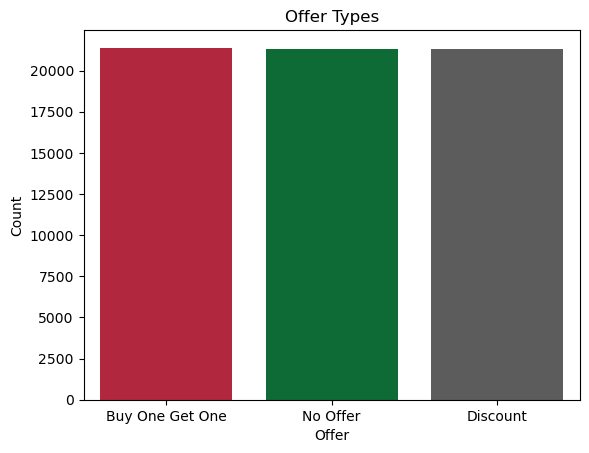

In [10]:
# set color palette

colors = ["#C8102E", "#007A33", "#5D5C5C"]

# plot bar chart of offer types
sns.countplot(x='offer', data=df, palette=colors)
plt.title('Offer Types')
plt.xlabel('Offer')
plt.ylabel('Count')
plt.show()


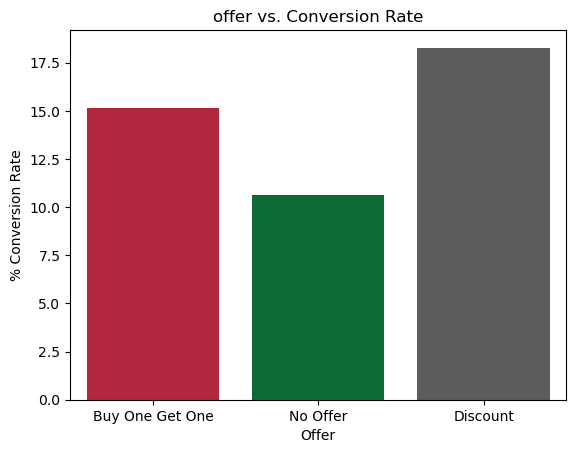

In [11]:
colors = ["#C8102E", "#007A33", "#5D5C5C"]

#calculate individual sums
sum_bogo = sum(df[df["offer"]=='Buy One Get One']['conversion']) * 100/sum(df["offer"]=='Buy One Get One')
sum_nooffer = sum(df[df["offer"]=='No Offer']['conversion']) * 100/sum(df["offer"]=='No Offer')
sum_discount = sum(df[df["offer"]=='Discount']['conversion']) * 100/sum(df["offer"]=='Discount')

# Plot bar chart of conversion rate by channel
sns.barplot(x=["Buy One Get One", "No Offer", "Discount"], y=[sum_bogo, sum_nooffer, sum_discount], palette=colors)
plt.title('offer vs. Conversion Rate')
plt.xlabel('Offer')
plt.ylabel('% Conversion Rate')
plt.show()

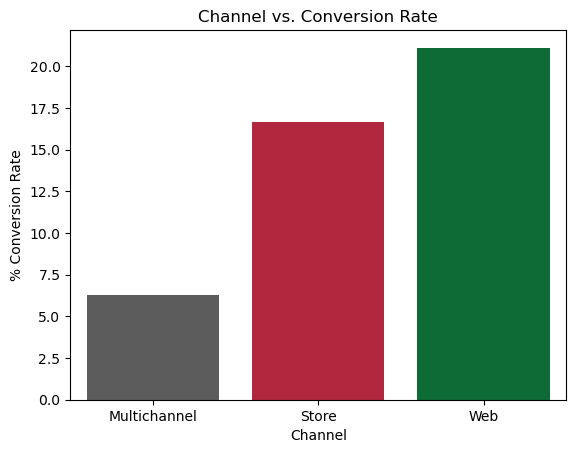

In [12]:
colors = ["#5D5C5C","#C8102E", "#007A33"]

#calculate individual sums
store = sum(df[df["channel"]=='store']['conversion']) * 100/sum(df["offer"]=='Buy One Get One')
web = sum(df[df["channel"]=='Web']['conversion']) * 100/sum(df["offer"]=='No Offer')
Multichannel = sum(df[df["channel"]=='Multichannel']['conversion']) * 100/sum(df["offer"]=='Discount')

# Plot bar chart of conversion rate by channel
sns.barplot(x=["Multichannel","Store", "Web"], y=[ Multichannel, store,web], palette=colors)
plt.title('Channel vs. Conversion Rate')
plt.xlabel('Channel')
plt.ylabel('% Conversion Rate')
plt.show()

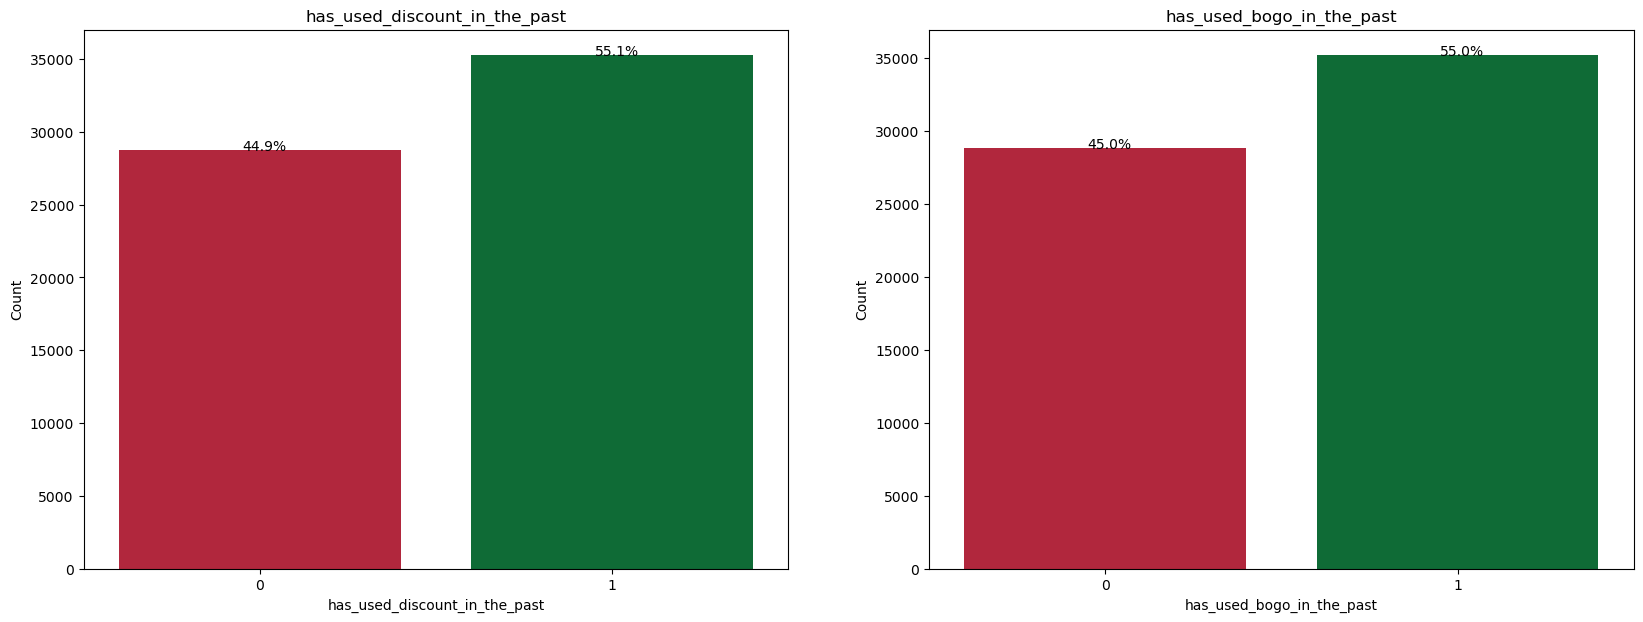

In [13]:
# create a list of numerical column names
num_cols = ['has_used_discount_in_the_past', 'has_used_bogo_in_the_past']

# set color palette
colors = ["#C8102E", "#007A33", "#5D5C5C"]

# create subplots
fig, axs = plt.subplots(1, len(num_cols), figsize=(20, 7))

# loop through numerical columns and plot distribution
for i, col in enumerate(num_cols):
    sns.countplot(x=col, data=df, palette=colors, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    total = float(len(df[col]))
    for p in axs[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.5
        axs[i].annotate(percentage, (x, y), size=10)

plt.show()

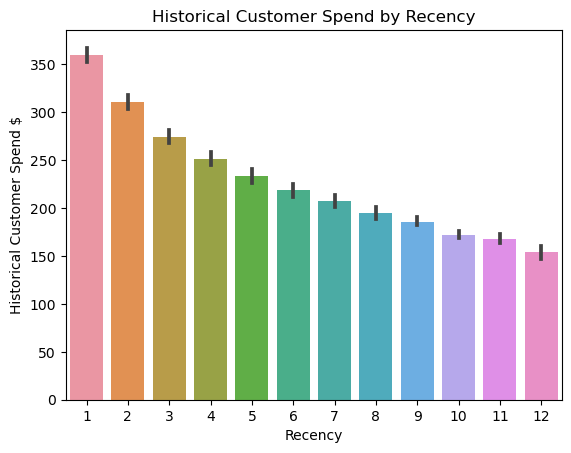

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='recency', y='historical customer spend', data=df)
plt.title('Historical Customer Spend by Recency')
plt.xlabel('Recency')
plt.ylabel('Historical Customer Spend $')
plt.show()


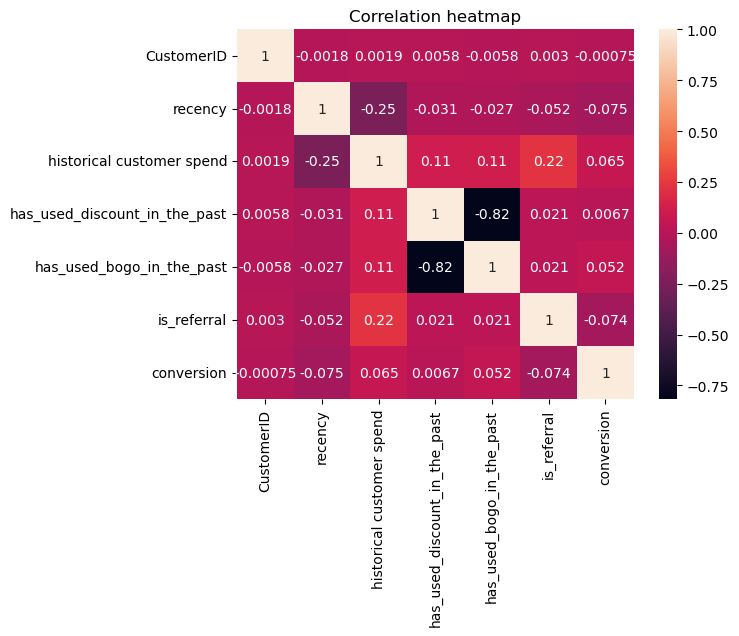

In [15]:
# Check the correlation between features
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation heatmap')
plt.show()


In [16]:
# calculating incremental uplift by number of conversions


# Split the dataset into offer groups and control group
bogo_group = df[df['offer'] == 'Buy One Get One']
discount_group = df[df['offer'] == 'Discount']
control_group = df[df['offer'] == 'No Offer']

# Calculate the number of conversions for each group
bogo_conversions = bogo_group['conversion'].sum()
discount_conversions = discount_group['conversion'].sum()
control_conversions = control_group['conversion'].sum()

# Calculate the incremental uplift of each group
bogo_uplift = (bogo_conversions - control_conversions) / control_conversions
discount_uplift = (discount_conversions - control_conversions) / control_conversions

# Print the number of conversions and incremental uplift of each group
print("Buy One Get One Conversions: {}".format(bogo_conversions))
print("Discount Conversions: {}".format(discount_conversions))
print("Control Conversions: {}".format(control_conversions))
print("Buy One Get One Incremental Uplift: {:.2%}".format(bogo_uplift))
print("Discount Incremental Uplift: {:.2%}".format(discount_uplift))

# Perform statistical significance testing
t, p = stats.ttest_ind(bogo_group['conversion'], discount_group['conversion'])
print("p value is ", p)
if p < 0.05:
    print("The difference in incremental uplift between Buy One Get One and Discount is statistically significant.")
else:
    print("The difference in incremental uplift between Buy One Get One and Discount is not statistically significant.")


Buy One Get One Conversions: 3238
Discount Conversions: 3894
Control Conversions: 2262
Buy One Get One Incremental Uplift: 43.15%
Discount Incremental Uplift: 72.15%
p value is  3.684113403908149e-18
The difference in incremental uplift between Buy One Get One and Discount is statistically significant.


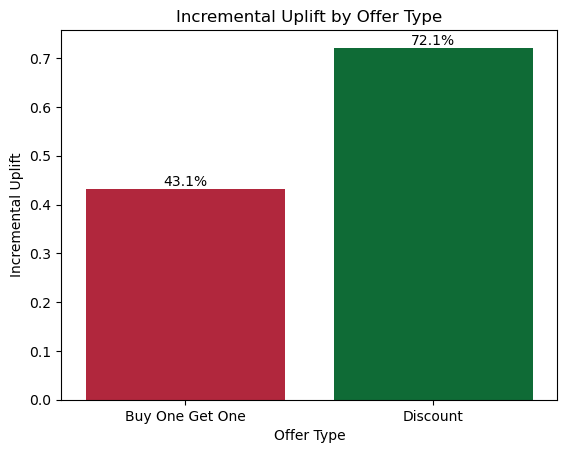

In [17]:
#plot incremental uplift by offer type
colors = ['#C8102E', '#007A33']
groups = ['Buy One Get One', 'Discount']
uplifts = [bogo_uplift, discount_uplift]

sns.barplot(x=groups, y=uplifts,palette=colors)
plt.title('Incremental Uplift by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Incremental Uplift')

# Add annotations for each bar with percentage uplifts
for i, v in enumerate(uplifts):
    plt.annotate("{:.1%}".format(v), xy=(i, v), ha='center', va='bottom')

plt.show()



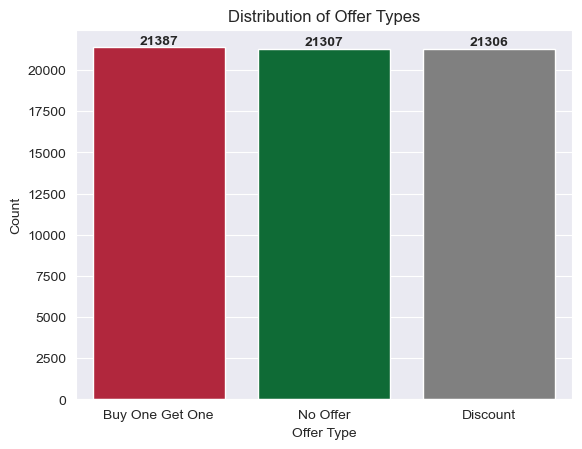

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['#C8102E', '#007A33', 'grey']
sns.set_style('darkgrid')
sns.countplot(x='offer', data=df,palette=colors)
plt.title('Distribution of Offer Types')
plt.xlabel('Offer Type')
plt.ylabel('Count')

# Add counts on the bars
counts = df['offer'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()


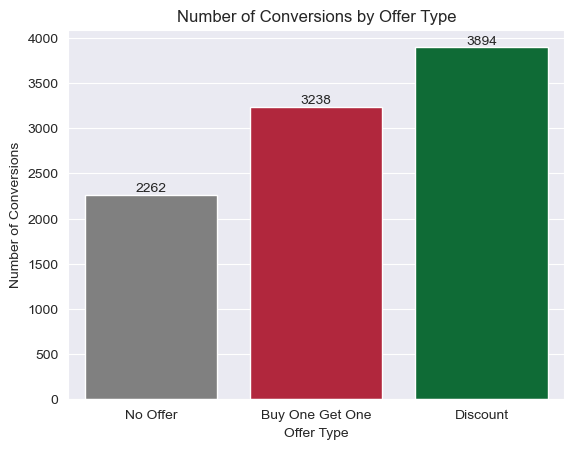

In [19]:
# Calculate the number of conversions for each group
bogo_conversions = bogo_group['conversion'].sum()
discount_conversions = discount_group['conversion'].sum()
control_conversions = control_group['conversion'].sum()

#plot the number of conversions by offer type
colors = ['grey','#C8102E', '#007A33']
groups = ['No Offer','Buy One Get One', 'Discount', 'No Offer']
conversions = [control_conversions, bogo_conversions, discount_conversions, control_conversions]

sns.barplot(x=groups, y=conversions,palette=colors)
plt.title('Number of Conversions by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Number of Conversions')

# Add annotations for each bar
for i, v in enumerate(conversions):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()


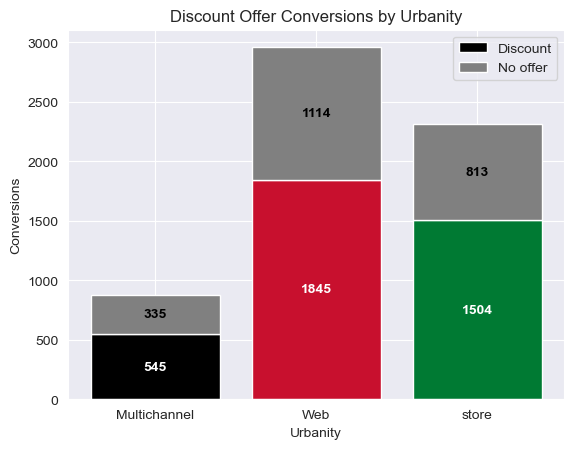

In [20]:
#plot discount offer conversions by Urbanity
colors = ['black','#C8102E', '#007A33']


# Calculate the number of conversions by customer segment for each offer
bogo_segments = bogo_group.groupby('channel')['conversion'].sum()
discount_segments = discount_group.groupby('channel')['conversion'].sum()
control_segments = control_group.groupby('channel')['conversion'].sum()

plt.bar(discount_segments.index, discount_segments, label='Discount', color=colors)
plt.bar(control_segments.index, control_segments, bottom=discount_segments, label='No offer', color='grey')

# Add counts of conversions for each segment
for i in range(len(discount_segments)):
    plt.text(discount_segments.index[i], discount_segments[i] / 2, str(discount_segments[i]), color='white', fontweight='bold', ha='center', va='center')
    plt.text(control_segments.index[i], discount_segments[i] + control_segments[i] / 2, str(control_segments[i]), color='black', fontweight='bold', ha='center', va='center')

plt.legend()
plt.title('Discount Offer Conversions by Urbanity')
plt.xlabel('Urbanity')
plt.ylabel('Conversions')

plt.show()


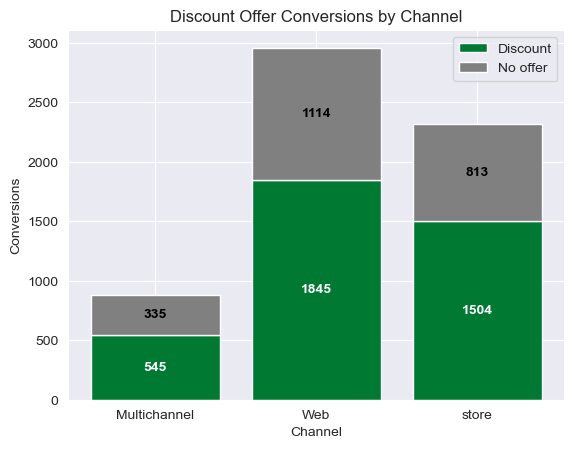

In [21]:
#plot discount offer conversions by channel

# Calculate the number of conversions by customer segment for each offer
bogo_segments = bogo_group.groupby('channel')['conversion'].sum()
discount_segments = discount_group.groupby('channel')['conversion'].sum()
control_segments = control_group.groupby('channel')['conversion'].sum()


plt.bar(discount_segments.index, discount_segments, label='Discount', color= '#007A33')
plt.bar(control_segments.index, control_segments, bottom=discount_segments, label='No offer', color='grey')

# Add counts of conversions for each segment
for i in range(len(discount_segments)):
    plt.text(discount_segments.index[i], discount_segments[i] / 2, str(discount_segments[i]), color='white', fontweight='bold', ha='center', va='center')
    plt.text(control_segments.index[i], discount_segments[i] + control_segments[i] / 2, str(control_segments[i]), color='black', fontweight='bold', ha='center', va='center')

plt.legend()
plt.title('Discount Offer Conversions by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversions')

plt.show()